# Midterm

## Student ID: XXXXXXXXX (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the first six Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the midterm.** To finish the midterm in the alloted 3 hrs, you will have to work efficiently. **Read the entirety of each question carefully.** You need to be signed into the Midterm Zoom session during the entire midterm with your video on and pointed at yourself. 

You need to submit the midterm by the due date (13:30) on OWL in the Test & Quizzes / Midterm section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received extra accommodation. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple version - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [50]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# No other packages are allowed in solving the modterm.   
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk 
import scipy 

# Get individual functions from 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, RocCurveDisplay
from scipy.stats import norm

## Data set

In 2007, Paulo Cortés and Aníbal Morais, at the University of Minho in Portugal, studied the use of data science techniques to tackle the challenging problem of forest fire prediction. They described their work as follows:

"Forest fires are a major environmental issue, creating economical andecological damage while endangering human lives. Fast detection is a key element for controlling such phenomenon. To achieve this, one alternative is to use automatic tools based on local sensors, such as provided by meteorological stations." 

In general, forest fire risks are measured using the Canadian Forest Fire Weather Index for rating forest fire danger (FFWI). You are provided with a dataset from the Montesinho natural park, from the Tras-os-Montes northeast region of Portugal. The data used in the experiments was collected from January 2000 to December 2003. At a daily basis, every time a forest fire occurred, several features were collected such as the time, date, spatial location within a 9×9 grid and the type of vegetation involved, four components of the FWI system and the total burned area, and complemented with several weather observations (e.g. wind speed) recorded at the time of the event. The specific variables available to you are:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 1 to 12 (categorical)
4. day - day of the week: 1 to 7 (categorical)
5. FFMC - FFMC (Rain, Temperature, Wind and Humidity relationship) index from the FWI system: 18.7 to 96.20
6. DMC - DMC (Rain, Temperature,and Humidity relationship) index from the FWI system: 1.1 to 291.3
7. DC - DC (Rain and Temperature relationship) index from the FWI system: 7.9 to 860.6
8. ISI - ISI (Wind speed risk) index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 (**target variable**).

With this information, answer the following questions using your knowledge from the course.


## Task 1: Predicting the size of the burned area (30 pts)

### Question 1.1: Data loading (X / 4 pts)

Load the data and present the basic descriptive statistics for all variables. How many cases are there? Are there any null values?

In [51]:
FF = pd.read_csv('forestfires.csv')
FF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Written answer: There are 517 observations. No variables have null values.**

### Question 1.2: Data cleaning (X / 3 pts)

The variables 'month' and 'day' are numerical. Transform these two so they are dummmy coded. Because in this question we are using non-regularized models, drop the first column for each variable. Written answer: How many new variables you created?

In [52]:
FF = pd.get_dummies(FF, drop_first=True, columns=['month','day'])
FF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.003868,0.001934,0.029014,0.332689,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.062137,0.043980,0.168007,0.471632,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Written answer: There are (7 - 1) + (12 - 1) = 17 new variables created.**

### Question 1.3: Data visualization (X / 5 pts)

Create a joint plot of the distribution between the temperature and the area. In the same plot, show the marginal distributions of these two variables seperately. Written answer: How would you characterize the distribution of `Area`? Is there a relationship between temperature and area? If yes, how would you describe it? 


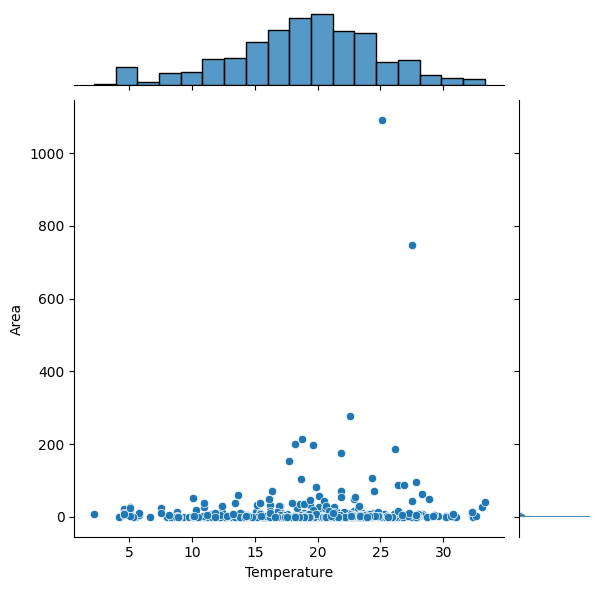

In [53]:
# Plot with correct axis labels [3pts]
ax = sns.jointplot(x=FF['temp'],y=FF['area'])
ax.ax_joint.set_xlabel('Temperature')
ax.ax_joint.set_ylabel('Area')
plt.show()

**Written answer: We can see the area has a very skewed distribution, with two events burning a large area. It is not completely clear if temperature and area are related given this skewness, but they appear to be positively correlated.** [2pts]

### 1.4 Logarithmic transformation (X / 3 pts)

Given the distribution of area, the original researchers proposed **using the logarithm of the area instead of the original variable**. Calculate this new target variable (name it ```LogArea```) so that $LogArea = log(area + 1)$.

Now, create a joint plot again of the distribution between the temperature and your newly created variable ```LogArea```. Written answer: Do you see any relationship more clearly now? Do you think it was a good idea to make this transformation? 

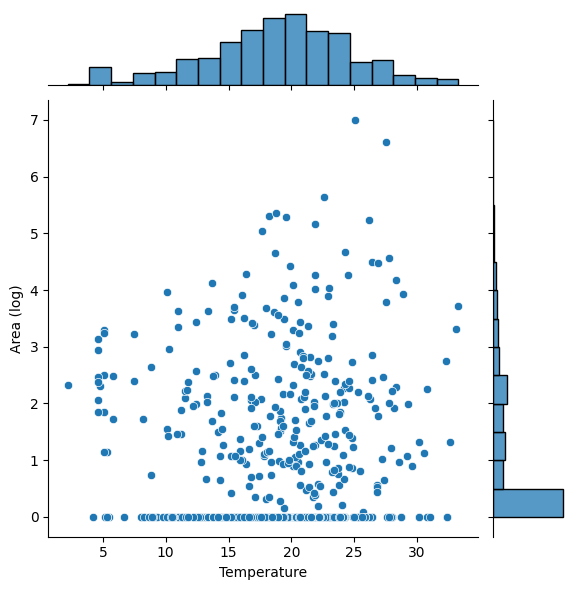

In [54]:
# Create the logarithmic transformation [1pt]
FF['LogArea'] = np.log(FF['area'] + 1)

# Plot relationship [1pt]
ax = sns.jointplot(x=FF['temp'], y=FF['LogArea'])
ax.ax_joint.set_xlabel('Temperature')
ax.ax_joint.set_ylabel('Area (log)')
plt.show()

**Written answer: The plot does look much better now and there seems to be a slight positive trend.** [1pt]

### Question 1.5: Regression comparison (X / 15 pts)

Now we will compare the performance of a linear regressor with the two different target variables. For this:

a. Create a train / test split using 30% of the data as a test set. Use a `random_state` of 1 if using `train_test_split` (2 pts).

b. Create a regression of all variables (X) versus the area variable (y) without transformation on the training data only (6 pts).

c. Create a regression of all variables (X) versus the log-transformed area variable (y) on the training data only (3 pts).

d. Calculate and report the mean absolute error of both models when predicting the variable `area` in the test set. Make sure you transform the prediction of the model in c) from log(area) to an area first! Written answer: Which one is the most accurate model? Why do you think this happens? (4 pts - 2pts for results, 2 pts for written answer)

In [55]:
# Define train and test
pred_vars = np.r_[0:9, 11:28]
targets = np.r_[10, 28]

x_train, x_test, y_train, y_test = train_test_split(FF.iloc[:, pred_vars],
                                                    FF.iloc[:, targets],
                                                    test_size=0.3, 
                                                    random_state=1)

# Linear regressions
area_reg = LinearRegression()
logarea_reg = LinearRegression()

# Fit
area_reg.fit(x_train, y_train.iloc[:,0])
logarea_reg.fit(x_train, y_train.iloc[:,1])

# Predict
pred_area = area_reg.predict(x_test)
pred_logarea = logarea_reg.predict(x_test)
pred_logarea = np.exp(pred_logarea) - 1

# Report Mean absolute error
mae_area = mean_absolute_error(y_test.iloc[:, 0], pred_area)
mae_logarea = mean_absolute_error(y_test.iloc[:, 0], pred_logarea)

print('The MAE of the area regression is %.3f and the MAE of the log-area regression is %.3f' % (mae_area, mae_logarea))

The MAE of the area regression is 21.175 and the MAE of the log-area regression is 13.285


**Written answer: The logarithmic model is clearly the more accurate model, with an error three times as small as the model without a logarithmic transform. For the untransformed data, the distribution is very sweked, such that the model fit (with minimizes the squared error) will be very sensitive to the large, outlying values. This makes the predictions very variable. For the model trained on log-transformed, this effect is mitigated, such that the model makes less variable predictions.**

## Task 2: Build a classifier to distinguish major and minor forest fires (35 points)

For the second task we will study whether we can differentiate a major from a minor forest fire. For this, we first need to decide what exactly a major forest fire is and test whether we can significantly differentiate one versus the other.

### Question 2.1: Building the new target variable. (X / 5 pts)

Let's start by defining a major burn as any forest fire that burns more than 1 ha. Reimport the data and now create the dummy variables without dropping any of the columns (as we will regularize). Then create a binary variable that represents whether a forest fire is larger than one ha or not. Written answer: Which percentage of fires are classified as major this way? 

Then create a set of histograms or distribution plots (you can use for example `displot` in seaborn) that shows the the distribution of the minor and major forest fires as a function of all major predictor variables (`X`, `Y`, `FFMC`, `DMC`, `DC`, `ISI`, `temp`, `RH`, `wind`, `rain`). Skip the dummy variables. What percentage of cases are classified as a major fire this way? Looking at the plots, do you think you can create a model differentiating between major and minor forest fires?

In [56]:
# Import thte data again without removing the redundant dummy variable [1pts]
FF = pd.read_csv('forestfires.csv')
FF = pd.get_dummies(FF, drop_first=False, columns=['month','day'])
FF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Define the binary variable and report number [1pts]

FF['major_fire'] = (FF['area'] > 1) * 1 # Turns into integer.
print('There are %.2f %% of cases classified as a major fire when using 1 ha as a cutoff' % (np.mean(FF['major_fire']) * 100.0))


There are 47.00 % of cases classified as a major fire when using 1 ha as a cutoff


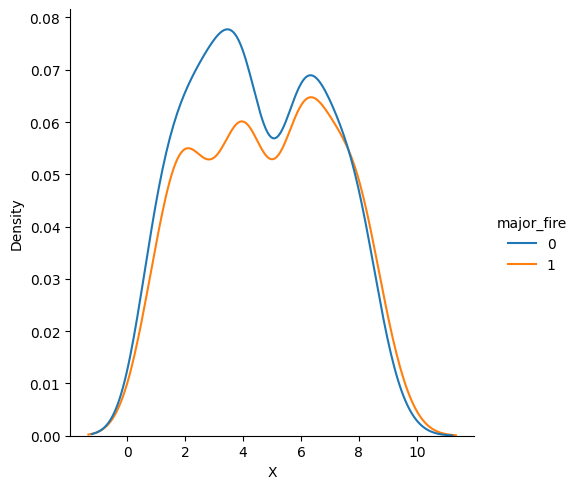

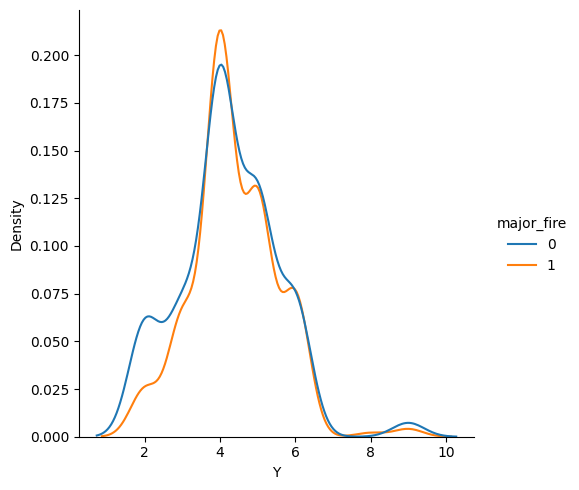

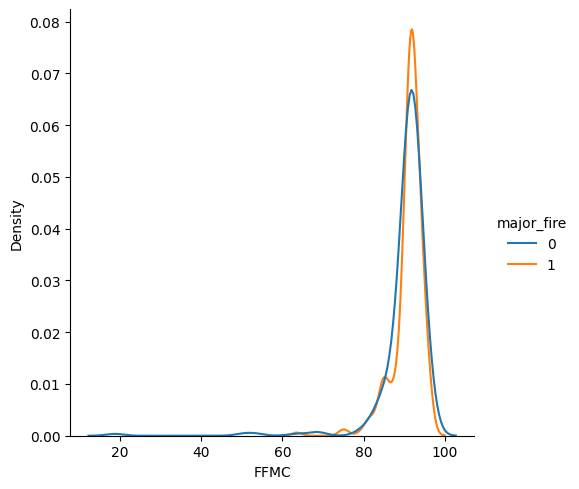

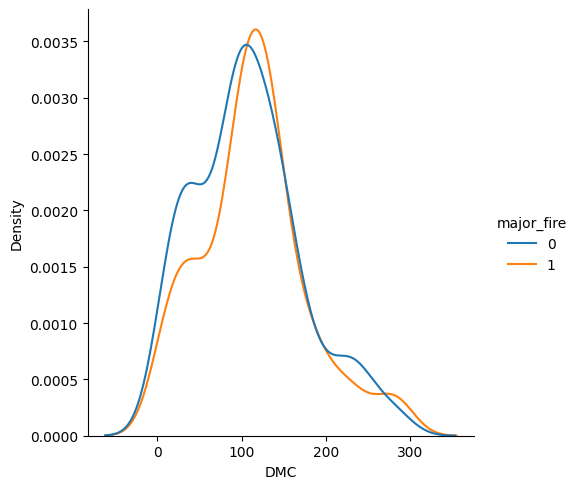

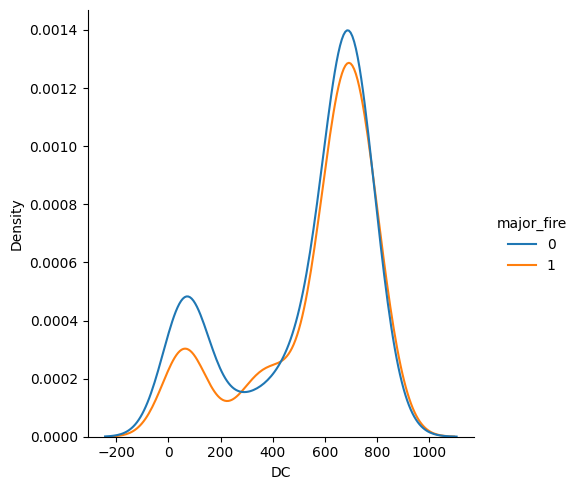

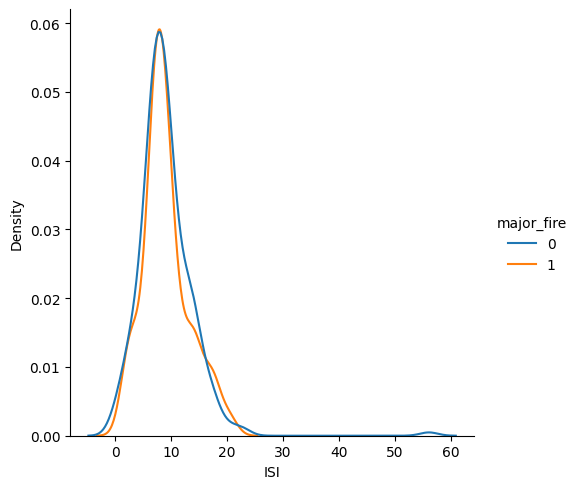

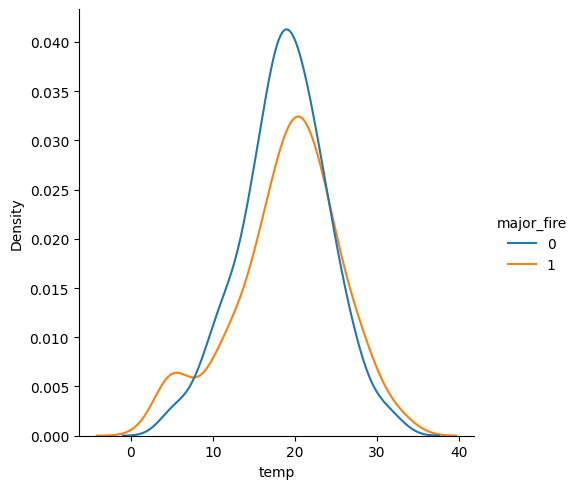

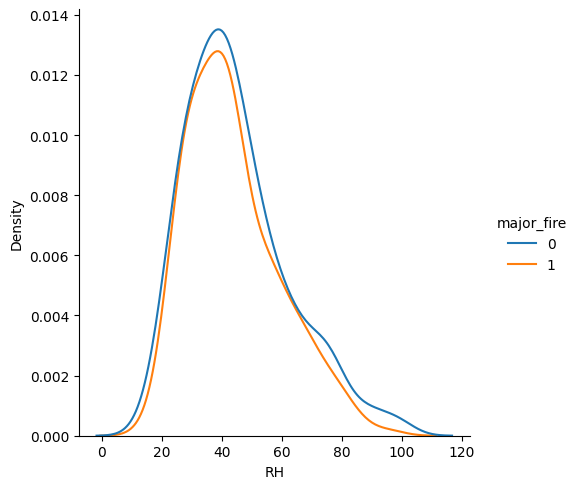

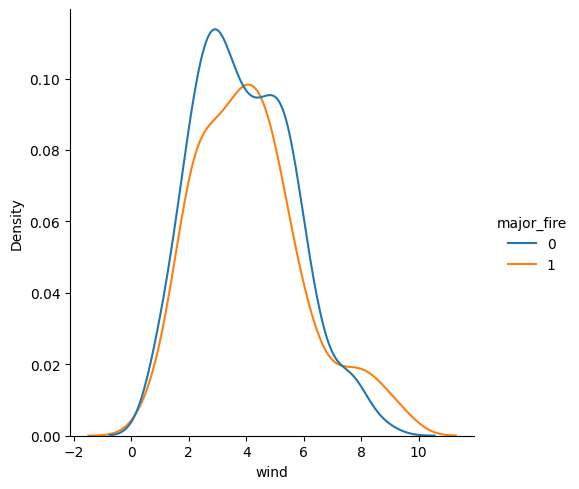

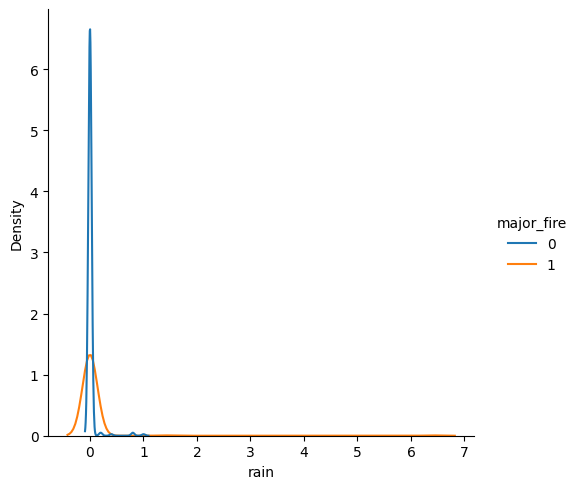

In [58]:
# Create the distribution plots or histograms for each regressor [2 pts]
for col_id in FF.columns[0:10]:
    sns.displot(data=FF, x=col_id, hue="major_fire", kind='kde')

**Written answer: Most plots are very similar, but some have some differences so it should be possible to predict the best model.** [1pt]

### Question 2.2: Ridge regression (X / 10 pts)

Now we need to put your theory from the previous written answer to the test. Your objective is to train a logistic regression using your newly created variable. For this:

a. Create a train / test split of the dataset reserving 30% for the test set. Use `random_state = 1` if using `train_test_split`. [2 pts]

b. Create a pipeline that first normalizes your training data and then trains a logistic regression **using Ridge penalty with a tolerance of 0.001 and sufficient iterations for the model to converge**. Use a C of 0.006 (Ridge parameter). [2pts]


c. Fit the model to the training data. Show the coefficients and what variable they are related to. [3pts]. Written answer: Based on these coefficients, which variable has the largest influence on the prediction[1pt]? In the context of this model, does wind speed lead to lower or higher risk of major fires[1pt]? How important is the influence of the day of the week and which of the days of the week are the riskiest[1pt]?

In [59]:
# a. Define predictive variables
pred_vars = np.r_[0:9, 11:30]
target = np.r_[30]

# Create train and test
x_train, x_test, y_train, y_test = train_test_split(FF.iloc[:, pred_vars],
                                                    FF.iloc[:, target],
                                                    test_size=0.3, 
                                                    random_state=1)

# Correct warning
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# b. Pipeline

LogFF = LogisticRegression(penalty='l2', solver='saga', tol=0.001, 
                           max_iter=1000, C=0.006)

LogPipeline = Pipeline(steps=[('Standardize', StandardScaler()),
                              ('Logistic', LogFF)]
                      )

# c. Training
LogPipeline.fit(x_train, y_train)

Pipeline(steps=[('Standardize', StandardScaler()),
                ('Logistic',
                 LogisticRegression(C=0.006, max_iter=1000, solver='saga',
                                    tol=0.001))])

In [60]:
LogCoefs = pd.DataFrame({'variables': FF.columns[pred_vars].values, 
                         'coefficients': LogPipeline._final_estimator.coef_[0]})
LogCoefs

,variables,coefficients
0,X,0.052929
1,Y,0.044708
2,FFMC,0.046758
3,DMC,-0.009016
4,DC,0.041208
5,ISI,0.023382
6,temp,0.034017
7,RH,-0.061577
8,wind,0.018788
9,month_apr,-0.001419


**Written answer: The largest coefficient is month_12 (December), which therefore is the most influential variable (after standarization). Higher wind speeds increase the risk of a major fire. The coefficients for the days of the week are all fairly small, but there seems to be Wednesdays and Saturdays are riskier than the other days.**

### Question 2.3: Validating your model. (X / 5 pts)

Now we will begin validating our model. Apply your results to the test set you created. Report the accuracy (leaving the default cutoff of 0.5), plot the ROC curve, and calculate the AUC. Comment on the performance of your model. How well does the model differentiate between major and minor forest fires?

In [61]:
# Apply pipeline to the test set. [1pts]
log_class_test = LogPipeline.predict(x_test)


# Calculate the precision measures. I am using the function from A.3 [1pts]
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")

    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)

  
    print("Accuracy:", round(acc, 3))


compute_performance(log_class_test, y_test,
                    LogPipeline._final_estimator.classes_)


tp: 21 tn: 55 fp: 31 fn: 49
Accuracy: 0.487


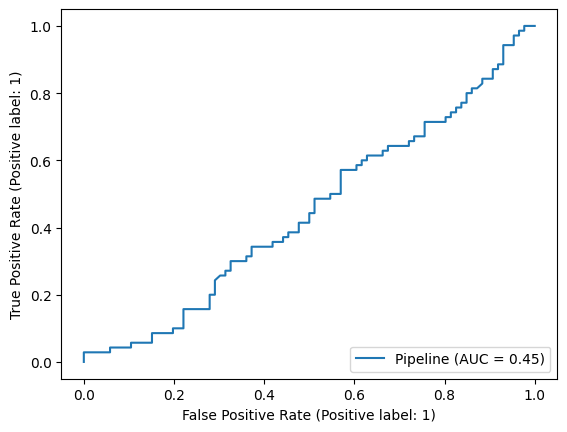

The AUC of the curve is 0.448


In [62]:
# ROC for all-variable classifier [2pts]
y_test_prob = LogPipeline.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob[:, 1], pos_label=1)
log_test_auc = auc(fpr, tpr)

# Plot curve
RocCurveDisplay.from_estimator(LogPipeline, x_test, y_test, pos_label=LogPipeline.classes_[1])
plt.show()
print('The AUC of the curve is %.3f' % log_test_auc)

**Written answer: The model is not able to predict the major fires very well. It is better than random, but it is not clear the results are useful.** [1pts]

### Question 2.4: A bootstrapped AUC measure. (X / 15 pts)

Now we want to estimate a bootstrapped AUC. Create a bootstrap measure over the training set, with 100 runs, training your pipeline and calculating the AUC each time. Be careful that you must calculate the AUC in the corresponding "test set" of the bootstrapped sample, that is, calculate the ROC curve over the elements that were not selected in the sample.

A useful function for this is [Panda's `isin` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.isin.html) that returns a vector showing if the index is in a set. You must select the elements of your original data that are NOT in the index of your sample. You use this function in the following way: if you have a dataset called ```sample``` with a sample of the original dataset called ```data```, then the following code creates a test set with the elements in ```data``` that are not in ```sample```:

```
test = data[~data.index.isin(sample.index.values)]
```

After you have calculated the bootstrapped AUC, plot the distribution you obtained and calculate the standard deviation of the bootstrap samples. Assuming a normal distribution of the estimated AUC, construct a 95% confidence for the AUC measure you obtained in Question 2.3. (hint: on a standard normal distribution 95% of the probability mass is between -1.96 and +1.96). 

In [63]:
# Running the bootstrap. [7pts]
def BootstrapPred(data, numboot=100):
    LogFF = LogisticRegression(penalty='l2', solver='saga', tol=0.001,
                               max_iter=1000, C=0.001)
    LogPipeline = Pipeline(steps=[('Standardize', StandardScaler()),
                                  ('Logistic', LogFF)]
                          )
    n = len(data)

    # Storing objects
    auc_out = np.zeros(numboot)
    fprs_out = []
    tprs_out = []
    thresholds_out = []

    for i in range(numboot):
        d = data.sample(n, replace=True)
        # Create test set
        selection = data.index.isin(d.index.values)
        test = data[~selection]
        # This line controls the rare case where every element is selected. 
        # Not necessary to add in midterm
        if len(test) == 0:
            continue
        # Fit pipeline
        LogPipeline.fit(d.iloc[:, :-1], d.iloc[:, -1])
        y_boot_prob = LogPipeline.predict_proba(test.iloc[:, :-1])
        fpr, tpr, thresholds = roc_curve(test.iloc[:, -1],
                                         y_boot_prob[:, 1], pos_label=1)
        auc_out[i] = auc(fpr, tpr)
        fprs_out.append(fpr)
        tprs_out.append(tpr)
        thresholds_out.append(thresholds)

    return auc_out, fprs_out, tprs_out, thresholds_out


# Calculate the ROC curve. Note I'm passing x_train and y_train together to be
# consistent with assignment bootstrap implementation
x_train_boot = x_train.copy()
x_train_boot['y'] = y_train
auc_out, fpr_out, tpr_out, thresholds_out = BootstrapPred(x_train_boot)

<Axes: ylabel='Count'>

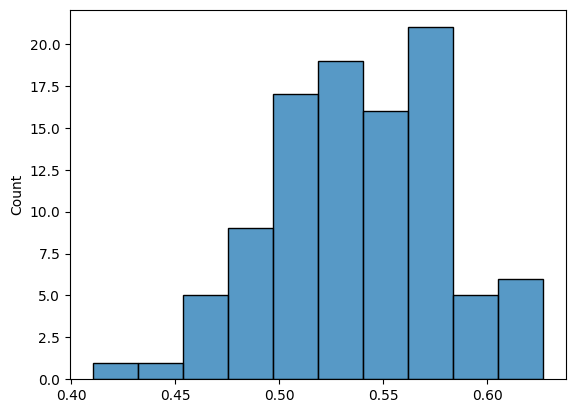

In [64]:
# Plot the distribution [2pts]
sns.histplot(auc_out)

In [65]:
# Calculate the AUC deviations [2pts] 
auc_dev = np.std(auc_out)
auc_dev

0.0412675389768062

In [66]:
# Calculate the AUC confidence intervals. [2pts for correct normal approx, 2 pts for centering it on the real AUC]
auc_min = log_test_auc - 1.96 * auc_dev
auc_max = log_test_auc + 1.96 * auc_dev
print('The confidence interval for the AUC is [%.3f, %.3f]' % (auc_min, auc_max))

The confidence interval for the AUC is [0.367, 0.529]


## Task 3: Build a regularized predictive model for temperature (35 points)

Because temperature is such an important dterminant of fire danger, in this task we are trying to build a good seasonal model of the temperature observed in the park. 

### Question 3.1 (X / 5 pts)
Reload the data set, so you get rid of your dummy variables and regain the original `month` and `day` variables. Make a `seaborn.stripplot` of Month on the x-axis and temperature on the y-axis. 
Written answer: What type of function would describe the relationship between average temperature and the month of the year best? Would a quadratic polynomial do well? For which month do you have the least observations? How many? 


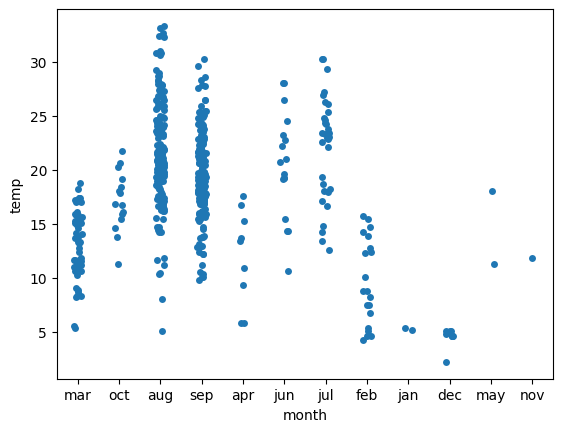

In [67]:
# Make the plot [2pts]
FF = pd.read_csv('forestfires.csv')
sns.stripplot(x=FF.month, y=FF.temp)
plt.show()

**Written answer: clearly the function is nonlinear with a peak in August - a simple quadratic function would capture some, but not all of the relationship [2pts]. November has only one observation - May has two.** [1pts] 

### Question 3.2 (X / 5 pts)
To model the relationship, you decide to encode the month of in terms of a fourier set (see lecture 6). 

Write a function `FourierExpansion(x,order)`, which takes a variable `x` scaled between 0 and 1, and returns a design matrix that has order times 2 columns. The first 2 columns should be set to: 

$sin(2 \pi x)$

$cos(2 \pi x)$

The next two columns: 

$sin(4 \pi x)$

$cos(4 \pi x)$

$...$

and the last two columns: 

$sin(2 order \pi x)$

$sin(2 order \pi x)$


Test the function by calling it with 

`x=(np.array(range(12))+1)/12` and `order = 6`. 

Plot the design matrix as an image. 

Written answer: 
Which of the 12 columns in the design matrix can / should be removed before fitting? 

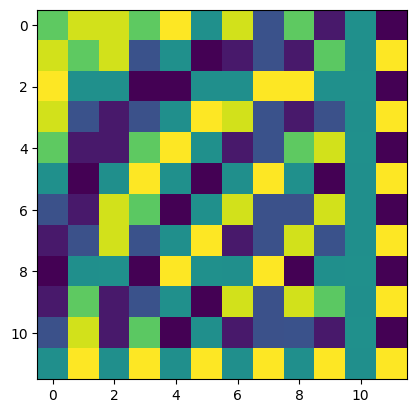

In [68]:
# Fourier Expansion function  [3pts]
def FourierExpansion(x,order):
    x=x*2*np.pi
    X=np.zeros((x.shape[0],0))
    for i in range(order):
        f = i+1; 
        X = np.c_[X,np.sin(f*x),np.cos(f*x)]
    return X 

# Correct plot [1pt]
x=(np.array(range(12))+1)/12
X= FourierExpansion(x, 6)
plt.imshow(X)
plt.show()

**Written answer: The second to last column only contains zeros - as it is the sine on the highest frequency. The column therefore can and should be removed before fitting a linear model.** [1pt]

### Question 3.3 (X / 5 pts)
Now generate two different design matrices (models) to model the variation of temperature across the month of the year. 
* Model 1: use your function from Question 2.2 to generate a Fourier set (order 6) for month. Make sure you scale month between 0 and 1 before submitting to the function. 
* Model 2: use `pd.get_dummies` to generate a dummy or one-hot encoding of month. Because we will use this for an unregualized model, make sure you drop the first column. 

Fit the two unregularized linear model to the data and report the mean-square-error and the $R^2$ value for both models. If you have done everything correctly, the mse and $R^2$ values should be identical. Why is this? Hint: How many columns are in each design matrix and how many month in the year are there?  

In [69]:
# Create the 2 design matrices [1pts]
XModel1 = np.c_[FourierExpansion(pd.to_datetime(FF['month'], format='%b').dt.strftime('%m').astype('int')/12, 6)]
XModel1 = np.delete(XModel1, 10, axis=1)
XModel2 = np.c_[pd.get_dummies(FF.month, drop_first=True)]

# Build and evaluate the regression models [1pt: Model fitting, 1pt:R^2, 1pt: MSE]
linreg1 = LinearRegression(fit_intercept=True) 
linreg1.fit(XModel1, FF.temp)
yp = linreg1.predict(XModel1)
mse1 = np.mean((FF.temp-yp)**2)
r2_1 = linreg1.score(XModel1, FF.temp)

linreg2 = LinearRegression(fit_intercept=True) 
linreg2.fit(XModel2,FF.temp)
yp = linreg2.predict(XModel2)
mse2 = np.mean((FF.temp-yp)**2)
r2_2 = linreg2.score(XModel2,FF.temp)


print(f'Mean Squared  error for Model 1: %.3f, %.3f' % (mse1, r2_1))
print(f'Mean Squared  error for Model 2: %.3f, %.3f' % (mse2, r2_2))
linreg2.rank_

Mean Squared  error for Model 1: 17.852, 0.469
Mean Squared  error for Model 2: 17.852, 0.469


11

**Written answer: Both models fit the data equally well - they both have 11 regressors - so together with the intercept they can fit any arbitary non-linear function of month.** [1pt]

### Question 3.4 (X / 12 pts)
a) Modify your dummy encoding model (Model 2 from Question 3.3), by not dropping the first column. This design matrix should have 12 regressors now. 

b) Build a pipeline, which first applies z-Standardization to each column of the design matrix and then fit an L2-regularlized linear model. 

c) Do a grid search, varying the regularization parameter between $exp(-5)$ and $exp(4)$ in 30 steps for the fourier-encoded model, (Model 1 from Question 3.3). Evaluate each setting of $\lambda$ using the mean-squared-error with 30-fold cross-validation. Plot the average validation error (y-axis) agains $log(\lambda)$ (x-axis). (*Hint: If you did not succeed in generating a fourier feature set, use `polynomialFeatures` to make a polynomial feature set for month of order 11.*)

d) Repeat c), this time using the dummy-coded feature set (modified Model 2 from question 3.4, part a). Plot the average validation error with a different color in the same plot as part c), so you can compare the models. 

e) Report the $\lambda$ value for each model that gives the best validation error. 

Written answer: What do you see? Why don't the two models behave the same way, as they did Question 3.3? 

Text(0, 0.5, 'Validation error')

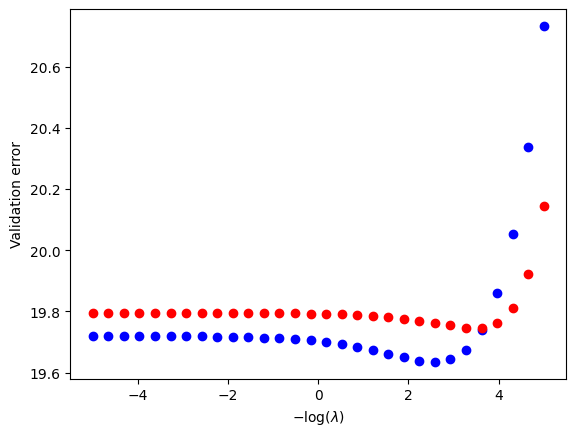

In [70]:
# a. Generate new dummy encoding [1pt]
XModel2 = np.c_[pd.get_dummies(FF.month,drop_first=False)]

# b. Build the pipeline with StandardScaler and Ridge [1pt]
pip = Pipeline([
    ('std', StandardScaler()),
    ('reg', Ridge())
    ])

# c. Grid search [5pts]
log_lambda = np.linspace(-5,5,30)
params = {'reg__alpha': np.exp(log_lambda)}
gscv1 = GridSearchCV(pip, param_grid=params, cv=30, scoring = 'neg_mean_squared_error', refit=True)
gscv1.fit(XModel1, FF.temp)
MSE1 = -gscv1.cv_results_['mean_test_score']
plt.scatter(log_lambda, MSE1,color='b')

# d. 
gscv2 = GridSearchCV(pip, param_grid=params, cv=30, scoring = 'neg_mean_squared_error', refit=True)
gscv2.fit(XModel2, FF.temp)
MSE2 = -gscv2.cv_results_['mean_test_score']
plt.scatter(log_lambda, MSE2,color='r')

plt.xlabel(r'$-\log(\lambda)$')
plt.ylabel('Validation error')


In [71]:
# e. Report the best regularization parameter [2pts]
l1 = gscv1.best_params_['reg__alpha']
l2 = gscv2.best_params_['reg__alpha']
print(f'Model 1 lambda: %.3f' % l1)
print(f'Model 2 lambda: %.3f' % l2)


Model 1 lambda: 13.279
Model 2 lambda: 37.363


**Written Answer: The two models behave differently - with the fourier set achieving lower validation error - and needing a lower value of the regularization parameter. While both regressor models span exactly the same linear space, regulatization pushes them towards different solution  - In the case of the fourier set / polynomial this will be a smoother function.** [2pts]

### Question 3.5 (X / 8 pts)
Now make a third model that has only a Fourier set of order 3 (or a polynomial feature set of order 5, if you did succeed in solving question 3.2). This is Model 3. 
Plot the same grid-search as in question 3.4 on this model and plot the validation error as a function of the regularization parameter. In the same plot, add the validation error for Model1 (Question 3.3/ 3.4). 

Written answer: 
You should see that Model 3 provides a better validation error for any setting of the ridge coefficient than the Model 1 considered in Question 3.4. Which one of the model is the more complex model? Which one is more likely to overfitting the data? Why can't L2-regularization fix this overfitting problem - why does the validation error for Model 1 not approach the validation error for Model 3?  

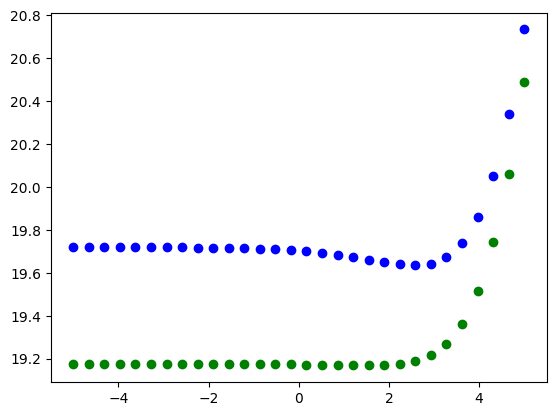

In [72]:
# Build the new model of order 3 [2pt]
XModel3 = np.c_[FourierExpansion(pd.to_datetime(FF['month'], format='%b').dt.strftime('%m').astype('int')/12,3)]

# Get and plot the new test scores [2pts]
gscv3 = GridSearchCV(pip, param_grid=params, cv=30, scoring = 'neg_mean_squared_error', refit=True)
gscv3.fit(XModel3, FF.temp)
MSE3 = -gscv3.cv_results_['mean_test_score']
plt.scatter(log_lambda, MSE1,color='b')
plt.scatter(log_lambda, MSE3,color='g')
plt.show()

**Written answer: 
The Model 3 in 3.5 is less complex than the Model 1 in 3.4, as it has less regressors. Model 1 is therefore more prone to overfitting. [2pts]
While regularization makes models "less complex", the ridge penality "shrinks" all regressor to the same degree. In this case the higher frequencies are as much impacted as the lower frequencies. Clearly, the temprature curve is smooth and high frequencies are not needed. To suppress the high frequencies in Model1 , the lower frequencies need to also be suppressed, increasing the bias of the model and leading to higher validation errors.** [2pt]